In [1]:
import numpy as np
from scipy.ndimage import correlate
from skimage import color, data
import matplotlib.pyplot as plt

original_image = data.astronaut()

## Q1 (a) Compute magnitude of gradient

In [2]:
def gradient_magnitude_computation(image: np.ndarray) -> np.ndarray:
    if len(image.shape) > 2:
        image = color.rgb2gray(image)
    
    sobel_x = np.array([[-1, 0, 1], 
                        [-2, 0, 2], 
                        [-1, 0, 1]])
    sobel_y = np.array([[1, 2, 1], 
                        [0, 0, 0], 
                        [-1, -2, -1]])

    gradient_x = correlate(image, sobel_x, mode='constant')
    gradient_y = correlate(image, sobel_y, mode='constant')

    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    return magnitude

## Q1 (b) Find min seam path

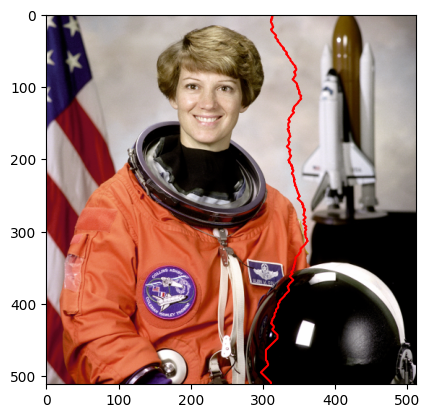

In [3]:
def find_min_seam_path(image: np.ndarray) -> np.ndarray:
    gradient_magnitude = gradient_magnitude_computation(image)
    rows, cols = gradient_magnitude.shape
    
    cumulative_min_energy = gradient_magnitude.copy()
    backtrack = np.zeros((rows, cols), int)
    for i in range(1, rows):
        for j in range(cols):
            if j == 0:
                neighbors = [j, j + 1]
            elif j == cols - 1:
                neighbors = [j - 1, j]
            else:
                neighbors = [j - 1, j + 1]

            min_index = np.argmin(cumulative_min_energy[i-1, neighbors[0]:neighbors[-1]+1])
            actual_min_index = neighbors[0] + min_index
            backtrack[i,j] = actual_min_index
            cumulative_min_energy[i, j] += cumulative_min_energy[i-1, actual_min_index]
    
    col = np.argmin(cumulative_min_energy[-1])
    min_seam = []
    for row in range(rows-1, -1, -1):
        min_seam.append([row,col])
        col = int(backtrack[row, col])
    return np.array(min_seam[::-1])

seam_path = find_min_seam_path(original_image)

plt.imshow(original_image)
plt.plot(seam_path[:, 1], seam_path[:, 0], 'r')
plt.show()

## Q1 (c) Remove first seam path

Original image shape: (512, 512, 3)
Image shape after removing 1 seam paths: (512, 511, 3)


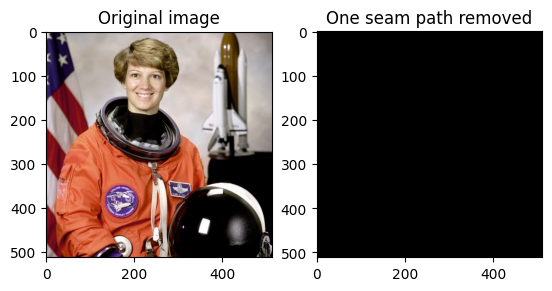

In [13]:
def remove_path(image: np.ndarray, path: np.ndarray) -> np.ndarray:
    # if len(image.shape) > 2:
    #     image = color.rgb2gray(image)

    rows, cols, z = image.shape
    new_image = np.zeros((rows, cols-1, z))
    for i in range(len(path)):
        new_image[i] = np.delete(image[i], path[i, 1], axis=0)
    
    return new_image.astype(np.uint8)

new_image = remove_path(original_image, find_min_seam_path(original_image))
print(f"Original image shape: {original_image.shape}")
print(f"Image shape after removing 1 seam paths: {new_image.shape}")

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(original_image)
axarr[0].set_title("Original image")
axarr[1].imshow(new_image)
axarr[1].set_title("One seam path removed")
plt.show()

## Q1 (d) Removing few seam paths

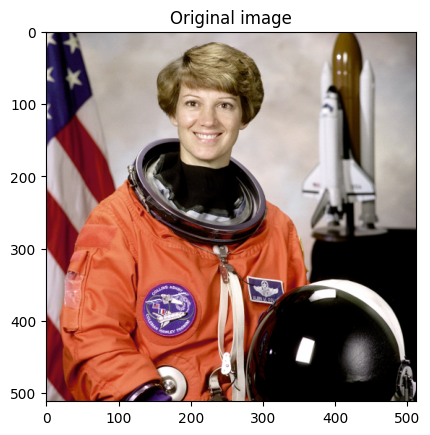

(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2,)
(511, 3)
(512, 3)
(2

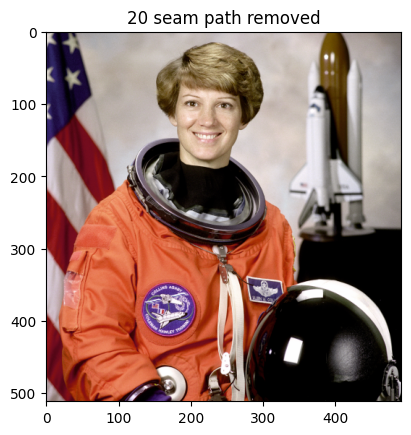

(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2,)
(491, 3)
(492, 3)
(2

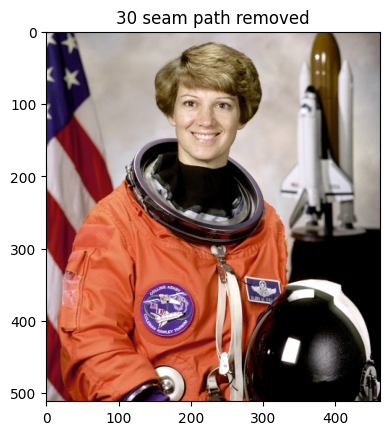

In [5]:
def remove_seam_paths(image: np.ndarray, n: int) -> np.ndarray:
    new_image = image.copy()
    all_paths = []
    for _ in range(n):
        seam_path = find_min_seam_path(new_image)
        all_paths.append(seam_path)
        new_image = remove_path(new_image, seam_path)
    return new_image

plt.imshow(original_image)
plt.title("Original image")
plt.show()

num_paths = 20
new_image = remove_seam_paths(original_image, num_paths)
print(f"Original image shape: {original_image.shape}")
print(f"Image shape after removing {num_paths} seam paths: {new_image.shape}")
plt.imshow(new_image)
plt.title(f"{num_paths} seam path removed")
plt.show()

num_paths = 30
new_new_image = remove_seam_paths(new_image, num_paths)
print(f"Image shape after removing {num_paths} additional seam paths: {new_new_image.shape}")
plt.imshow(new_new_image)
plt.title(f"{num_paths} seam path removed")
plt.show()